In [7]:
#import pandas
import pandas as pa
import matplotlib as plot
from matplotlib import pyplot

#get data
def GetData(fileName):
    return pa.read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.head(10)

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96
1999-01-07,83.12
1999-01-08,82.37
1999-01-11,77.03
1999-01-12,83.44


In [8]:
exchangeRatesSeries.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


<AxesSubplot:xlabel='Date'>

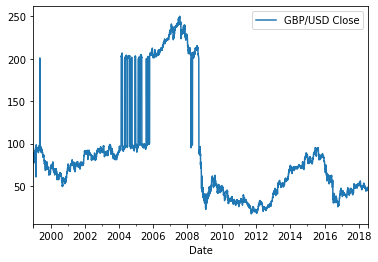

In [9]:
exchangeRatesSeries.plot()


array([[<AxesSubplot:title={'center':'GBP/USD Close'}>]], dtype=object)

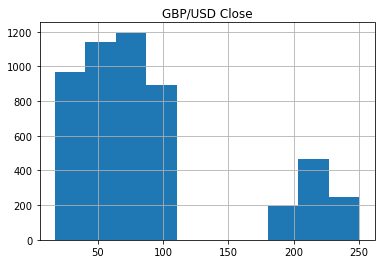

In [10]:
exchangeRatesSeries.hist()

In [11]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

In [20]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [22]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#creating data
ExchangeRates = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

#predict next value
predicted = StartARIMAForecasting(ExchangeRates, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

Predicted=15.219304


C:\Users\scott\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Actual=25.703000, Predicted=24.789999
Actual=25.211000, Predicted=25.855253
Actual=25.110000, Predicted=25.533655
Actual=24.872000, Predicted=25.500816
Actual=25.363000, Predicted=24.950220
Actual=25.170000, Predicted=25.129554
Actual=27.179000, Predicted=25.134028
Actual=27.836000, Predicted=27.344714
Actual=27.985000, Predicted=28.361205
Actual=27.105000, Predicted=28.947673
Actual=26.920000, Predicted=28.030636
Actual=26.985000, Predicted=26.998661
Actual=26.249000, Predicted=26.611450
Actual=25.962000, Predicted=25.880147
Actual=25.566000, Predicted=25.765171
Actual=25.989000, Predicted=25.191400
Actual=25.758000, Predicted=25.561007
Actual=25.783000, Predicted=25.578370
Actual=26.084000, Predicted=25.794520
Actual=26.210000, Predicted=26.133329
Actual=27.010000, Predicted=26.217579
Actual=26.853000, Predicted=27.203998
Actual=25.614000, Predicted=27.170572
Actual=25.077000, Predicted=25.928744
Actual=25.090000, Predicted=24.978505
Actual=25.618000, Predicted=24.385685
Actual=25.98

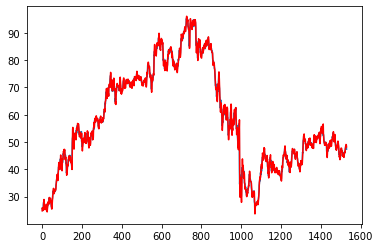

In [27]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

AttributeError: 'list' object has no attribute 'head'